# Ali Abdullah Ahmad
# CWID - 20031246
# Midterm

### ANS 3
#3 (10 Points)
Load the “hepatitis_A.csv” dataset, from the Raw_data module in
CANVAS, into Python (see the data dictionary at the bottom of this
document). This is a dataset used for predicting “patient mortality”.
Perform the EDA analysis by:
I. Summarizing each numerical column (e.g., min, max,
mean)
II. Displaying scatter plots of “BILIRUBIN”,” SGOT” and
“ALBUMIN” one pair at a time
III. Showing box plots for columns “BILIRUBIN”,” SGOT”
and “ALBUMIN”

In [203]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('D:/Stevens GIT/Stevens_IT-MS_in_CS/SPRING_25/CS513_Knowledge_Discovery&Data_Mining/MIdterm/hepatitis_A.csv')

I. Summarizing each numerical column (e.g., min, max,
mean)

In [204]:
profile = ProfileReport(df, title="Profiling data frame")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [205]:
df.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,2.000000


In [206]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
 VARICES            5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
HISTOLOGY           0
Age_Quartile        0
dtype: int64

In [207]:
df.dropna(inplace=True)
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
 VARICES           0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
Age_Quartile       0
dtype: int64

II. Displaying scatter plots of “BILIRUBIN”,” SGOT” and
“ALBUMIN” one pair at a time

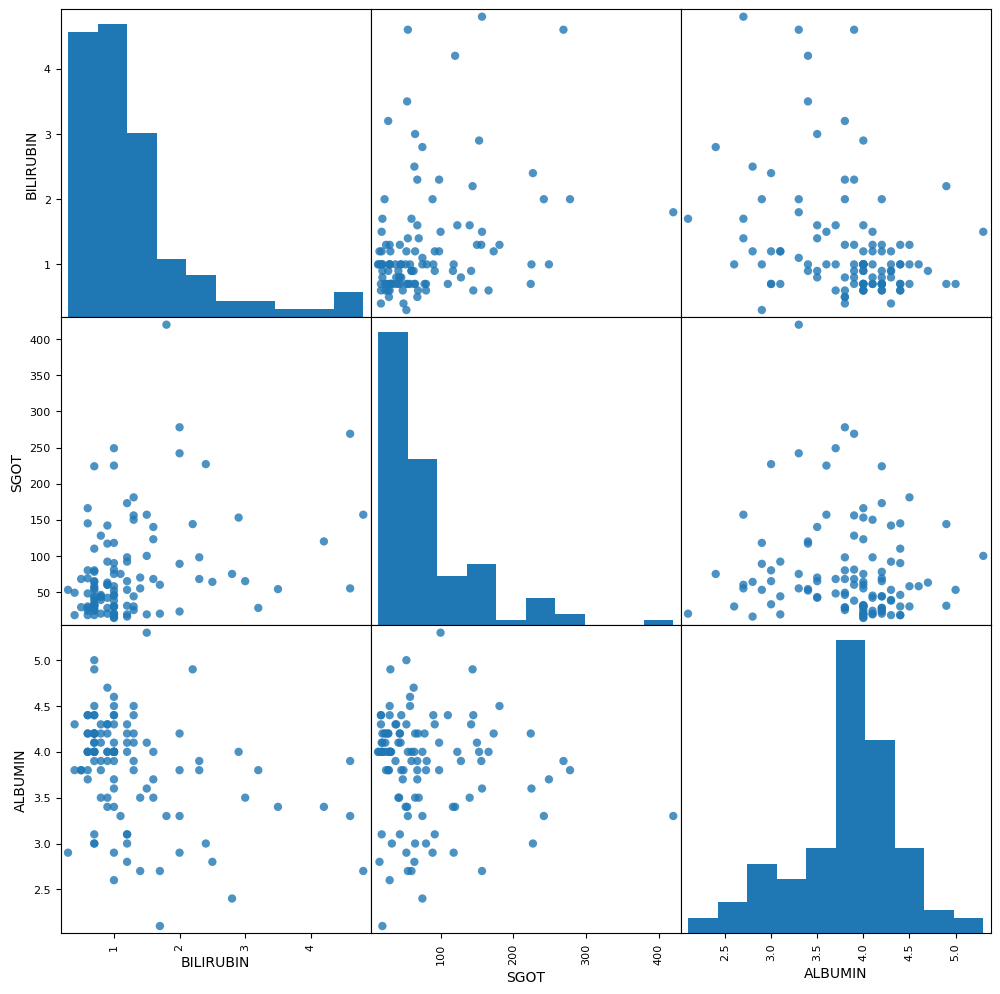

In [208]:
import matplotlib.pyplot as plt

df_features = df[['BILIRUBIN', 'SGOT', 'ALBUMIN']]
pd.plotting.scatter_matrix(df_features, figsize=(12, 12), diagonal='hist', alpha=0.8, marker='o')
plt.show()

III. Showing box plots for columns “BILIRUBIN”,” SGOT”
and “ALBUMIN”

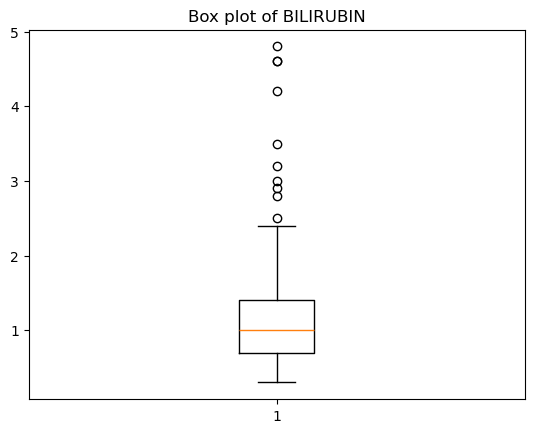

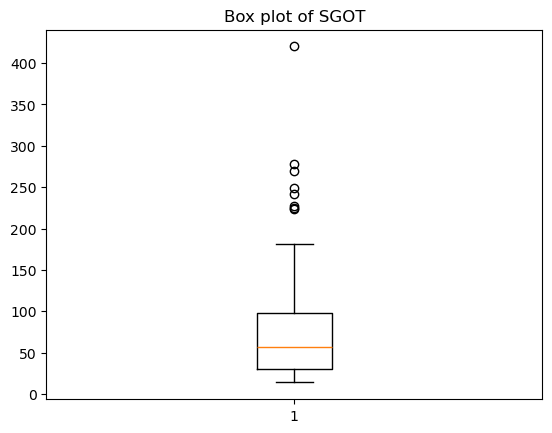

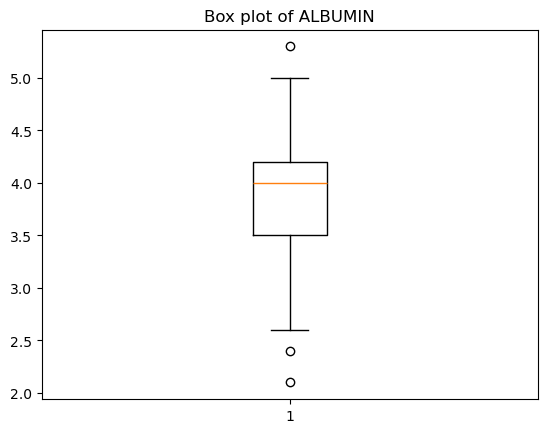

In [209]:
%matplotlib inline

columns = ['BILIRUBIN', 'SGOT', 'ALBUMIN']
for col in columns:
    plt.figure()
    plt.boxplot(df[col].dropna()) #since ALBUMIN has 16  null values
    plt.title(f'Box plot of {col}')
    plt.show()


### #4 (15 Points)
Load the “hepatitis_A.csv” dataset, from the Raw_data module in CANVAS, into
Python/R (Excel file containing another variation of the hepatitis dataset). This
is a dataset used for predicting “patient mortality”. Construct a CART model to
classify “patient mortality” based only on the “SEX”,”Age_Quartile”, “STEROID”,
“FATIGUE” and “MALAISE” attributes

In [210]:
#importing libraries
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [211]:
print(df['Age_Quartile'].isnull().sum())
df['Age_Quartile'].unique()

0


array(['Q1', 'Q3', 'Q4', 'Q2'], dtype=object)

In [212]:
# Convert 'Age_Quartile' to integer and map its values
df['Age_Quartile'] = df['Age_Quartile'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}).astype('int64')
print(df['Age_Quartile'].dtype)

# Convert selected columns to integer
df[['SEX','Age_Quartile', 'STEROID', 'FATIGUE', 'MALAISE']] = df[['SEX','Age_Quartile', 'STEROID', 'FATIGUE', 'MALAISE']].astype('int64')

int64


In [213]:
#Attributes vs Target split
X = df[['SEX','Age_Quartile', 'STEROID', 'FATIGUE', 'MALAISE']]
y = df['Class']  #patient mortality is decided by 'class' attribute in the csv


In [214]:
#Train test split
X_train ,  X_test, y_train , y_test = train_test_split(X , y , test_size= 0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89, 5)
(89,)
(23, 5)
(23,)


In [215]:
#Model Building 
model = DecisionTreeClassifier(criterion='gini',random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [216]:
#Prediction
predictDTC = model.predict(X_test)

In [217]:
#Evaluate using accuracy, confusion matrix

accuracy = accuracy_score(predictDTC,y_test)
print(f'accuracy of DTC =  {accuracy:.4f}')
print(confusion_matrix(predictDTC,y_test))
print(classification_report(predictDTC,y_test))

accuracy of DTC =  0.7826
[[ 1  5]
 [ 0 17]]
              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.77      1.00      0.87        17

    accuracy                           0.78        23
   macro avg       0.89      0.58      0.58        23
weighted avg       0.83      0.78      0.72        23



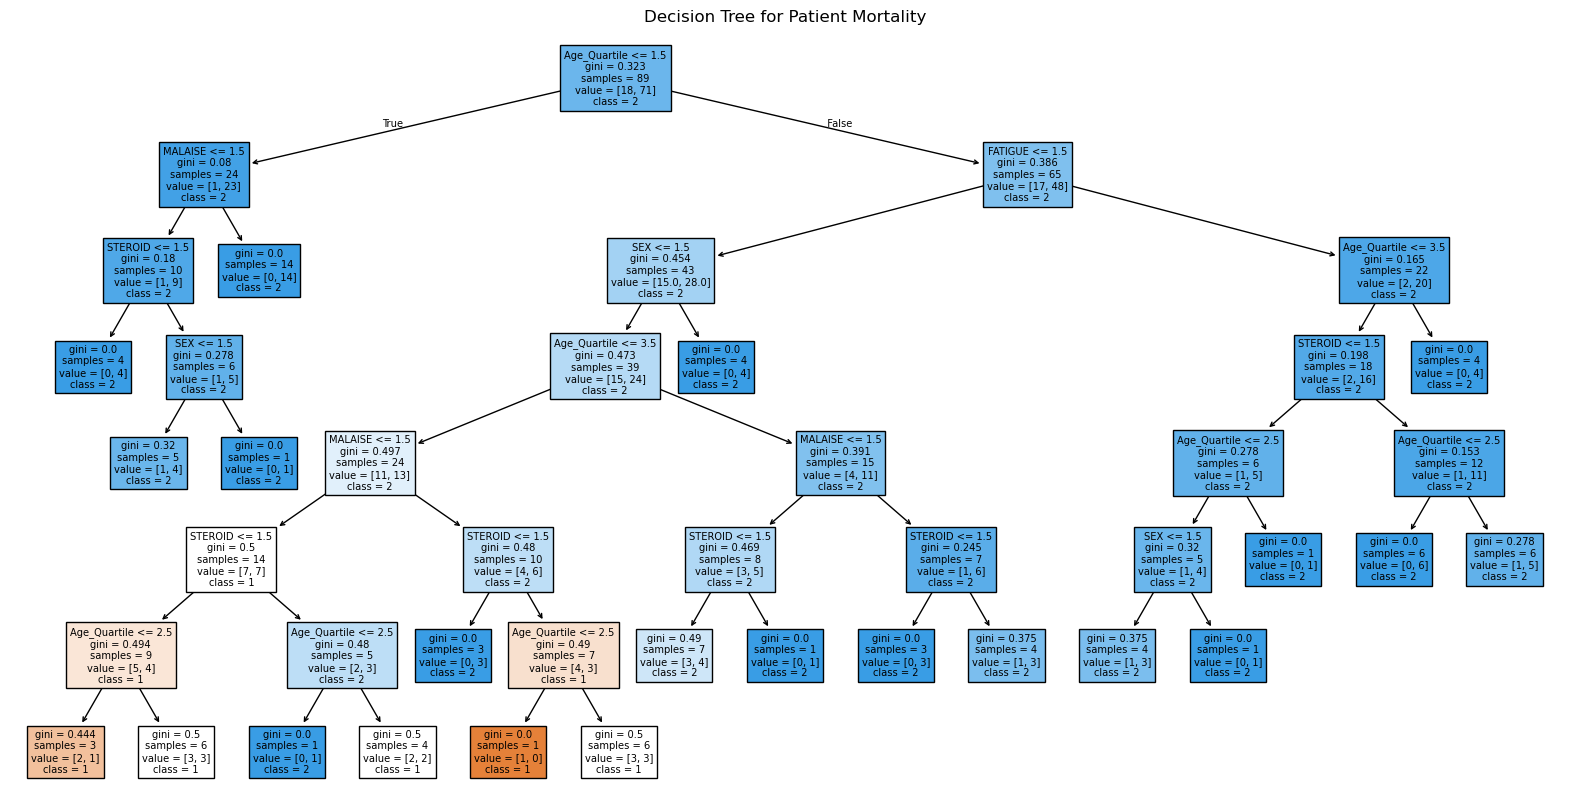

In [218]:
#building plot tree diagram
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['1', '2'], filled=True)
plt.title('Decision Tree for Patient Mortality')
plt.show()

### max depth <= 4 gives us more accuracy

In [219]:
# Initialize and train the Decision Tree (CART model)
cart_model = DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=42)
cart_model.fit(X_train, y_train)

# Make predictions
y_pred = cart_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9565217391304348
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23



c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Initialize and train the Decision Tree (CART model AT MAX_DEPTH = 4)
cart_model2 = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
cart_model2.fit(X_train, y_train)

# Make predictions
y_pred = cart_model2.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9565217391304348
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23



c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


: 